In [1]:
# Format: [board_state, optimal_move]
# board_state: 3x3 grid flattened into a 9-element array (0 = empty, 1 = X, 2 = O)
# optimal_move: position to play (0-8)

# Example: [0, 0, 0, 0, 0, 0, 0, 0, 0], 4
# Initialize an empty dataset list
dataset = []

# Path to your .txt file
file_path = 'tic_tac_toe_dataset_allgames.txt'

# Open the file and read the data
with open(file_path, 'r') as file:
    for line in file:
        # Remove any leading/trailing whitespace and newline characters
        line = line.strip()
        
        # Skip empty lines
        if not line:
            continue
        
        # Split the line into the board state and the move
        board_str, move_str = line.split('],')
        
        # Convert the board string to a list of integers
        board = eval(board_str + ']')
        
        # Convert the move string to an integer
        move = int(move_str.strip())
        
        # Append the parsed data to the dataset
        dataset.append((board, move))

# Print the dataset to verify
#for data in dataset:
#    print(data)


# Split into Player 1 and Player 2 datasets
# Initialize lists to store separated board states
player_1_turn = []  # Even number of moves played (Player 1's turn next)
player_2_turn = []  # Odd number of moves played (Player 2's turn next)

# Iterate through the dataset
for board, move in dataset:
    # Count the number of non-zero elements in the board state
    moves_played = sum(1 for cell in board if cell != 0)
    
    # Separate based on whether the count is even or odd
    if moves_played % 2 == 0:
        player_1_turn.append((board, move))  # Player 1's turn next
    else:
        player_2_turn.append((board, move))  # Player 2's turn next

# Print the results
#print("Player 1's turn next:")
#for data in player_1_turn:
#    print(data)

#print("\nPlayer 2's turn next:")
#for data in player_2_turn:
#    print(data)

dataset = player_2_turn

def rotate_board(board, degrees):
    """
    Rotate the board by the specified degrees (90, 180, or 270).
    """
    if degrees == 90:
        return [board[6], board[3], board[0],
                board[7], board[4], board[1],
                board[8], board[5], board[2]]
    elif degrees == 180:
        return [board[8], board[7], board[6],
                board[5], board[4], board[3],
                board[2], board[1], board[0]]
    elif degrees == 270:
        return [board[2], board[5], board[8],
                board[1], board[4], board[7],
                board[0], board[3], board[6]]
    else:
        return board  # No rotation

def rotate_move(move, degrees):
    """
    Rotate the move by the specified degrees (90, 180, or 270).
    """
    if degrees == 90:
        rotation_map = {0: 2, 1: 5, 2: 8, 3: 1, 4: 4, 5: 7, 6: 0, 7: 3, 8: 6}
    elif degrees == 180:
        rotation_map = {0: 8, 1: 7, 2: 6, 3: 5, 4: 4, 5: 3, 6: 2, 7: 1, 8: 0}
    elif degrees == 270:
        rotation_map = {0: 6, 1: 3, 2: 0, 3: 7, 4: 4, 5: 1, 6: 8, 7: 5, 8: 2}
    else:
        return move  # No rotation
    return rotation_map.get(move, move)

def rotate_dataset(dataset):
    """
    Rotate the dataset by 90°, 180°, and 270°.
    """
    rotated_dataset = []
    for board, move in dataset:
        # Original board
        rotated_dataset.append((board, move))
        
        # Rotate 90°
        rotated_board_90 = rotate_board(board, 90)
        rotated_move_90 = rotate_move(move, 90)
        rotated_dataset.append((rotated_board_90, rotated_move_90))
        
        # Rotate 180°
        rotated_board_180 = rotate_board(board, 180)
        rotated_move_180 = rotate_move(move, 180)
        rotated_dataset.append((rotated_board_180, rotated_move_180))
        
        # Rotate 270°
        rotated_board_270 = rotate_board(board, 270)
        rotated_move_270 = rotate_move(move, 270)
        rotated_dataset.append((rotated_board_270, rotated_move_270))
    return rotated_dataset


def mirror_horizontal(board):
    """
    Mirror the board horizontally (flip along the middle row).
    """
    return [board[6], board[7], board[8],
            board[3], board[4], board[5],
            board[0], board[1], board[2]]

def mirror_vertical(board):
    """
    Mirror the board vertically (flip along the middle column).
    """
    return [board[2], board[1], board[0],
            board[5], board[4], board[3],
            board[8], board[7], board[6]]

def mirror_move(move, mirror_type):
    """
    Adjust the move index after mirroring.
    """
    if mirror_type == "horizontal":
        mirror_map = {0: 6, 1: 7, 2: 8, 3: 3, 4: 4, 5: 5, 6: 0, 7: 1, 8: 2}
    elif mirror_type == "vertical":
        mirror_map = {0: 2, 1: 1, 2: 0, 3: 5, 4: 4, 5: 3, 6: 8, 7: 7, 8: 6}
    else:
        return move  # No mirroring
    return mirror_map.get(move, move)

def mirror_dataset(dataset, mirror_type):
    """
    Append horizontally or vertically mirrored board states and moves to the dataset.
    """
    mirrored_dataset = []
    for board, move in dataset:
        # Original board
        mirrored_dataset.append((board, move))
        
        # Mirrored board
        if mirror_type == "horizontal":
            mirrored_board = mirror_horizontal(board)
            mirrored_move = mirror_move(move, "horizontal")
        elif mirror_type == "vertical":
            mirrored_board = mirror_vertical(board)
            mirrored_move = mirror_move(move, "vertical")
        else:
            raise ValueError("Invalid mirror_type. Use 'horizontal' or 'vertical'.")
        
        mirrored_dataset.append((mirrored_board, mirrored_move))
    return mirrored_dataset

# Generate the rotated dataset
rotated_dataset = rotate_dataset(dataset)

rotated_dataset = mirror_dataset(rotated_dataset, "horizontal")

#rotated_dataset = mirror_dataset(rotated_dataset, "vertical")

# Print the rotated dataset to verify
#print("Rotated dataset:")
#for data in rotated_dataset:
#    print(data)

# Convert to numpy arrays for training
import numpy as np
X = np.array([x for x, y in rotated_dataset])
y = np.array([y for x, y in rotated_dataset])


from sklearn.tree import DecisionTreeClassifier

# Train the model
model = DecisionTreeClassifier(
    criterion='entropy',       # Use Gini impurity for splits
    splitter='best',        # Choose the best split
    max_depth=10,           # Limit the depth of the tree
    min_samples_split=2,    # Require at least 5 samples to split a node
    min_samples_leaf=1,     # Require at least 3 samples in a leaf node
    max_features='sqrt',    # Use the square root of the number of features
    class_weight='balanced',# Handle imbalanced classes (if any)
    random_state=42         # Set a random seed for reproducibility
)
model.fit(X, y)

# Save the model
import joblib
joblib.dump(model, "tictactoe_model.pkl")

['tictactoe_model.pkl']

In [2]:
# Find the best parameters: 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize the decision tree model
model = DecisionTreeClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [3]:
# Best cross-validation score
from sklearn.metrics import accuracy_score, confusion_matrix

# Predict on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Test Accuracy: 0.7466666666666667
Confusion Matrix:
 [[ 50   3  11   2   0   3   2   1   8]
 [  7  61   1   0   0   4   1  18   1]
 [  2   0  63   9   0   1   9   1   0]
 [  5   3   1  65   0   6   0   6   1]
 [  0   0   0   0 203   0   0   0   0]
 [  3   2   8  28   1  62   1   2   1]
 [  0   3  14   6   0   2  53   0   0]
 [  0  14   1   0   0   3   5  64   1]
 [  3   2  16   1   0   3   0   2  51]]


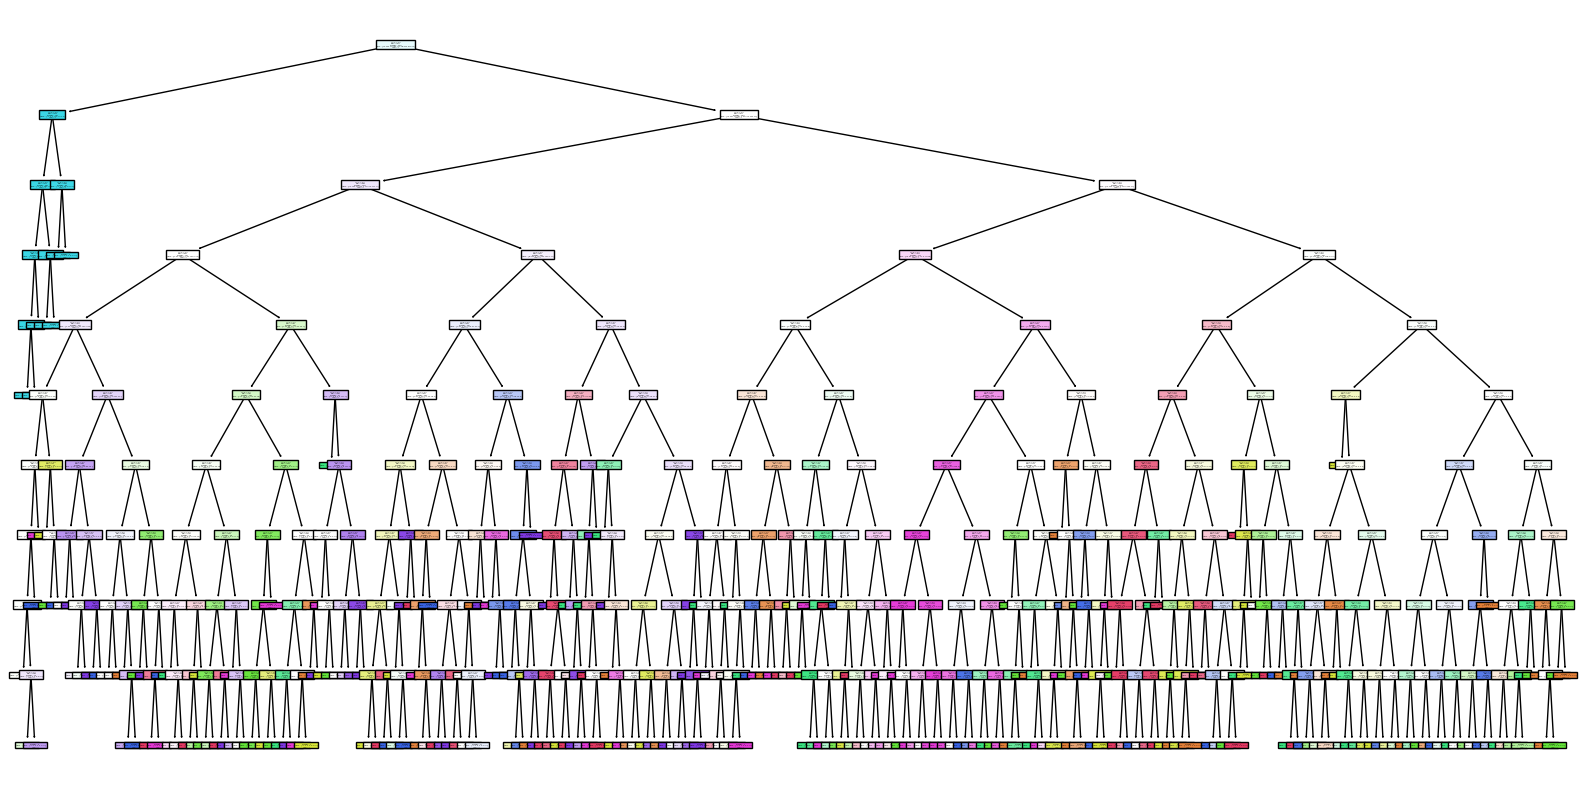

In [6]:
# Visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    grid_search.best_estimator_, 
    filled=True, 
    feature_names=[f"cell_{i}" for i in range(9)], 
    class_names=[str(i) for i in range(9)]
)

# Save the figure as an SVG file
plt.savefig("decision_tree.svg", bbox_inches="tight", format="svg")  # Save before showing

plt.show()


In [3]:
# Convert the model to JavaScript

import m2cgen as m2c
import joblib

# Load the trained model
model = joblib.load("tictactoe_model.pkl")

# Convert the model to JavaScript
js_code = m2c.export_to_javascript(model)

# Save the JavaScript model
with open("tictactoe_model.js", "w") as f:
    f.write(js_code)